In [3]:
#Se importa el almacenamiento Google Drive, ésto puede ser visible desde el menú de la izquierda
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
#Librerias
import os
import random
from skimage.io import imread
import cv2
from keras.preprocessing import image
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import torch
import torchvision.transforms as transforms
from keras.layers.advanced_activations import LeakyReLU

%matplotlib inline

In [ ]:
#Carga de imagenes ENTRENAMIENTO
imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Train/Glasses'
x_trn_glass=[]

#Imagenes con gafas
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))
    #x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (60,64), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))
    #x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (30,32), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))

imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Adiciones_Gafas'
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))

x_trn_glass=np.array(x_trn_glass)
print(x_trn_glass.shape)
print(x_trn_glass.dtype)

#Imagenes sin gafas
imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Train/No Glasses'
x_trn_Noglass=[]
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_trn_Noglass.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))
    #x_trn_Noglass.append(cv2.cvtColor(cv2.resize(Face, (60,64), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))
    #x_trn_Noglass.append(cv2.cvtColor(cv2.resize(Face, (30,32), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))

imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Adiciones_NoGafas'
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_trn_Noglass.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))


x_trn_Noglass=np.array(x_trn_Noglass)
print(x_trn_Noglass.shape)
print(x_trn_Noglass.dtype)

(903, 213, 171)
float32
(720, 213, 171)
float32


In [ ]:
glassLabel=[1]*len(x_trn_glass)
NoglassLabel=[0]*len(x_trn_Noglass)
dataGlass=list(zip(x_trn_glass,glassLabel))
dataNoGlass=list(zip(x_trn_Noglass,NoglassLabel))

dataGlass=pd.DataFrame(dataGlass,columns = ['Img', 'Glasses'])
dataNoGlass=pd.DataFrame(dataNoGlass,columns = ['Img', 'Glasses'])
trndata=pd.concat([dataGlass,dataNoGlass])

trndata = trndata.sample(frac=1).reset_index(drop=True)
trndata

,Img,Glasses
0,"[[80.00456, 79.35206, 78.602325, 77.83658, 77....",0
1,"[[99.68742, 102.82638, 106.177444, 104.235374,...",0
2,"[[68.504196, 69.647446, 70.105934, 68.71914, 6...",1
3,"[[77.07502, 77.401955, 79.51621, 79.742546, 79...",1
4,"[[92.21336, 92.530205, 92.5435, 90.69864, 82.9...",1
...,...,...
1618,"[[179.9392, 182.67293, 180.38881, 179.79904, 1...",1
1619,"[[176.80571, 176.33658, 174.52351, 170.5152, 1...",1
1620,"[[82.88068, 82.177635, 84.00704, 84.18827, 83....",1
1621,"[[188.2599, 187.36864, 189.30782, 190.36484, 1...",1


In [ ]:
#Carga de imagenes VALIDACIÓN
imgV_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Faces'
x_vad=[]
valLabel=[]
for img in sorted(os.listdir(imgV_path)):
    Face=cv2.imread(imgV_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    if Face.shape[0]==120:
      if 'open' in img:
        valLabel.append(0)
      else:
        valLabel.append(1)
  
      x_vad.append(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA).astype('float32'))
      #x_vad.append((Face).astype('float32'))
    
x_vad=np.array(x_vad)
print(x_vad.shape)
print(x_vad.dtype)

valdata=list(zip(x_vad,valLabel))
#valdata=pd.DataFrame({'Img':x_vad,'Glasses':valLabel})
valdata=pd.DataFrame(valdata,columns = ['Img', 'Glasses'])

#valdata['Glasses']=pd.Categorical(valdata['Glasses'])
valdata=valdata.sample(frac=1).reset_index(drop=True)
valdata



(640, 213, 171)
float32


,Img,Glasses
0,"[[35.0, 25.703125, 14.109375, 0.0, 0.0, 0.0, 0...",1
1,"[[77.0, 77.0, 76.34375, 75.0, 75.0, 75.0, 74.6...",1
2,"[[44.0, 44.0, 44.0, 44.0, 42.015625, 42.0, 42....",0
3,"[[79.0, 77.671875, 77.0, 77.0, 76.00781, 74.68...",0
4,"[[34.0, 12.0859375, 1.0, 1.0, 0.0078125, 1.968...",0
...,...,...
635,"[[0.0, 0.0, 1.640625, 5.0, 0.0390625, 0.0, 5.7...",0
636,"[[80.0, 73.359375, 70.0, 70.0, 70.99219, 70.34...",0
637,"[[0.0, 1.9921875, 5.953125, 12.0, 7.0390625, 2...",0
638,"[[0.0, 7.96875, 30.703125, 69.0, 68.00781, 58....",0


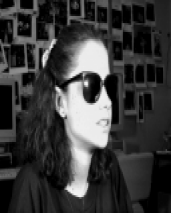

(213, 171)
Data Type: float32
Min: 0.000, Max: 245.242
1


In [ ]:
#Aquí pueden cambiar el número que está dentro de [] y ver las imágenes y su tamaño
cv2_imshow(valdata['Img'][0])
print(valdata['Img'][0].shape)
print('Data Type: %s' % valdata['Img'][0].dtype)
print('Min: %.3f, Max: %.3f' % (valdata['Img'][0].min(), valdata['Img'][0].max()))
print(valdata['Glasses'][0])

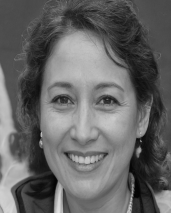

(1623,)
Data Type: float32
Min: 3.405, Max: 224.901
0


In [ ]:
cv2_imshow(trndata['Img'][0])
print(trndata['Img'].shape)
print('Data Type: %s' % trndata['Img'][0].dtype)
print('Min: %.3f, Max: %.3f' % (trndata['Img'][0].min(), trndata['Img'][0].max()))
print(trndata['Glasses'][0])

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(213,171,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_train=np.array(trndata['Img'].to_list(), dtype=np.float64)
y_train=trndata['Glasses']
x_val=np.array(valdata['Img'].to_list(), dtype=np.float64)
y_val=valdata['Glasses']

In [ ]:
history=model.fit(x_train, pd.get_dummies(y_train).values , epochs=10, validation_data=(x_val, pd.get_dummies(y_val).values), batch_size=64)

Epoch 1/10
26/26 [==============================] - 4s 106ms/step - loss: 2.3841 - accuracy: 0.4997 - val_loss: 0.6924 - val_accuracy: 0.6062
Epoch 2/10
26/26 [==============================] - 2s 93ms/step - loss: 0.6404 - accuracy: 0.6778 - val_loss: 0.7507 - val_accuracy: 0.5734
Epoch 3/10
26/26 [==============================] - 2s 94ms/step - loss: 0.6518 - accuracy: 0.6993 - val_loss: 0.6859 - val_accuracy: 0.6328
Epoch 4/10
26/26 [==============================] - 2s 94ms/step - loss: 0.3564 - accuracy: 0.8811 - val_loss: 0.7564 - val_accuracy: 0.7188
Epoch 5/10
26/26 [==============================] - 2s 94ms/step - loss: 0.2081 - accuracy: 0.9427 - val_loss: 0.7557 - val_accuracy: 0.6859
Epoch 6/10
26/26 [==============================] - 2s 94ms/step - loss: 0.1658 - accuracy: 0.9476 - val_loss: 0.6962 - val_accuracy: 0.6875
Epoch 7/10
26/26 [==============================] - 2s 94ms/step - loss: 0.1212 - accuracy: 0.9581 - val_loss: 0.9944 - val_accuracy: 0.6406
Epoch 8/10
2

In [ ]:
#Guardado del modelo
model.save('/content/drive/MyDrive/Trabajos/Trabajo 3/Código/modelo.h5')